# BD inhibition and inducible gene and enhancer bursts

Good replicates

In [91]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")
include(ENV["Code"]*"/../Code_Paper/Code/meanmRNAcounts_BSBF.jl")

ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")
include(ENV["Code"]*"/../Code_Paper/Code/meanmRNAcounts_BSBF.jl")

include("LoadData.jl")

include("Functions.jl")
include("DoTests.jl");

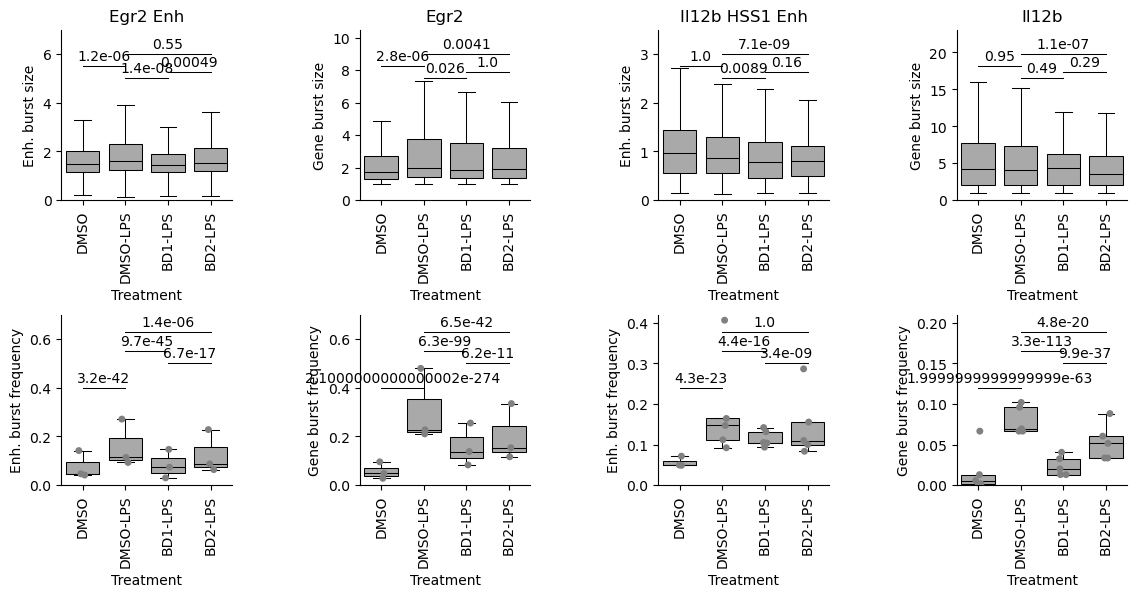

In [71]:
figure(figsize = (12, 6))
include("WT_BS_pannels.jl")
include("WT_BF_pannels.jl")
plt.tight_layout()
savefigwithtext("Il12bEgr2_WT_BFBS_GOOD.svg")

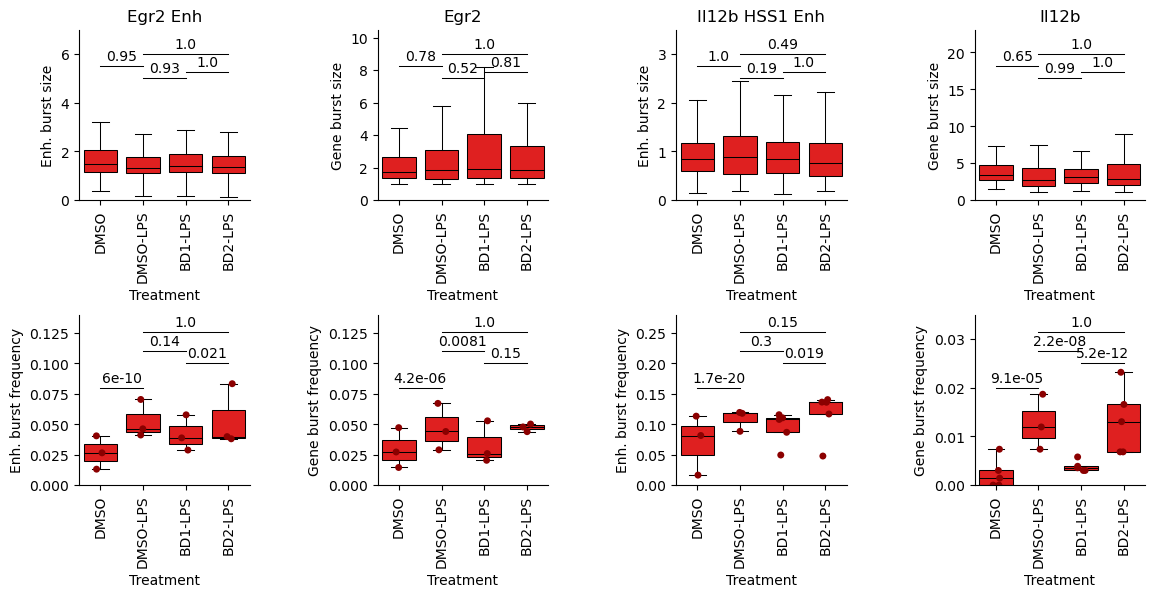

In [74]:
# Effect on burst size and burst frequency in WT
figure(figsize = (12, 6))
include("Rad21_BS_pannels.jl")
include("Rad21_BF_pannels.jl")
plt.tight_layout()
savefigwithtext("Il12bEgr2_Rad21_BFBS_GOOD.svg")

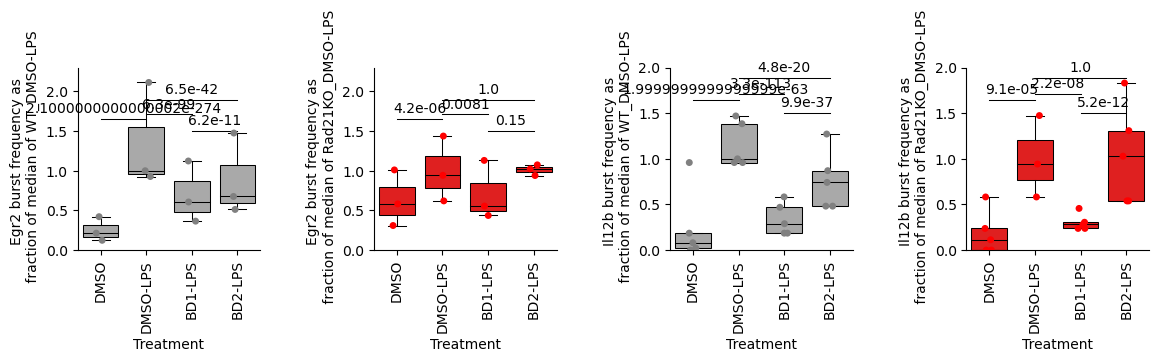

In [75]:
function WT_DMSOLPSas1(df)
    ndf = deepcopy(df)
    bfas1 = Statistics.median(ndf[ndf[!,:Sample].=="WT_DMSO-LPS", :BF])
    ndf[!,:BF] = ndf[!,:BF] ./ bfas1
    ndf
end


function Rad21KO_DMSOLPSas1(df)
    ndf = deepcopy(df)
    bfas1 = Statistics.mean(ndf[ndf[!,:Sample].=="Rad21KO_DMSO-LPS", :BF])
    ndf[!,:BF] = ndf[!,:BF] ./ bfas1
    ndf
end

figure(figsize = (12, 3))
subplot(1,4,1)
l = 2.3
n = 3
plot_BF_Genotype(WT_DMSOLPSas1(BFs_all_gene_egr2),TEST_gene_egr2;
    hs = [0.55, 0.57, 0.63, 0.50].*n,
    ylimit = l, 
    Genotype = "WT",
    colorstripplot = "gray",
    colorboxplot = "darkgray",
    ylabel_ = "Egr2 burst frequency as \n fraction of median of WT_DMSO-LPS")

subplot(1,4,2)
n = 3
u = 0
plot_BF_Genotype(Rad21KO_DMSOLPSas1(BFs_all_gene_egr2),TEST_gene_egr2;
    hs = [0.55, 0.57, 0.63, 0.50].*n.+ u,
    ylimit = l, 
    Genotype = "Rad21KO",
    colorstripplot = "red",
    colorboxplot = "red",
    ylabel_ = "Egr2 burst frequency as \n fraction of median of Rad21KO_DMSO-LPS")


subplot(1,4,3)

n = 3
plot_BF_Genotype(WT_DMSOLPSas1(BFs_all_gene_il),TEST_gene_il;
    hs = [0.55, 0.57, 0.63, 0.50].*n,
    ylimit = 2, 
    Genotype = "WT",
    colorstripplot = "gray",
    colorboxplot = "darkgray",
    ylabel_ = "Il12b burst frequency as \n fraction of median of WT_DMSO-LPS")

subplot(1,4,4)
n = 3
u = -0
plot_BF_Genotype(Rad21KO_DMSOLPSas1(BFs_all_gene_il),TEST_gene_il;
    hs = [0.55, 0.57, 0.63, 0.50].*n.+ u,
    ylimit = 2, 
    Genotype = "Rad21KO",
    colorstripplot = "red",
    colorboxplot = "red",
    ylabel_ = "Il12b burst frequency as \n fraction of median of Rad21KO_DMSO-LPS")

plt.tight_layout()

savefigwithtext("Figure8ab_alternative_asfractionofmedianactivatedcells.svg")
savefigwithtext("Figure8ab_alternative_asfractionofmedianactivatedcells.png")

In [95]:

tb = BFs_all_gene_egr2
wt = tb[tb[!,:Genotype].=="Rad21KO", :]
println(string("Egr2 number of cells WT: ", sum(wt[!, :N_cells])))

Egr2 number of cells WT: 9097


In [93]:
tb = BFs_all_gene_il
wt = tb[tb[!,:Genotype].=="WT", :]
println(string("Il12b number of cells WT: ", sum(wt[!, :N_cells])))
println(string("rep: ", length(unique(wt[!, :Rep]))))
wt

Il12b number of cells WT: 28863
rep: 5


,Sample,Rep,Genotype,Timepoint,N_cells,N_TSS1,N_TSS2,N_TSS,BF
,String31,Int64,SubStri…,SubStri…,Int64,Int64,Int64,Int64,Float64
1,WT_DMSO,1,WT,DMSO,465,0,0,0,0.0
2,WT_DMSO-LPS,1,WT,DMSO-LPS,1262,231,26,257,0.101823
3,WT_BD1-LPS,1,WT,BD1-LPS,1354,85,3,88,0.0324963
4,WT_BD2-LPS,1,WT,BD2-LPS,944,90,7,97,0.0513771
5,WT_DMSO,2,WT,DMSO,328,1,0,1,0.00152439
6,WT_DMSO-LPS,2,WT,DMSO-LPS,1653,216,13,229,0.069268
7,WT_BD1-LPS,2,WT,BD1-LPS,1273,51,0,51,0.0200314
8,WT_BD2-LPS,2,WT,BD2-LPS,962,109,7,116,0.0602911
9,WT_BD2-LPS,7,WT,BD2-LPS,1783,91,28,119,0.0333707


In [94]:
tb = BFs_all_gene_hss1
wt = tb[tb[!,:Genotype].=="WT", :]
println(string("HSS1 number of cells WT: ", sum(wt[!, :N_cells])))
println(string("rep: ", length(unique(wt[!, :Rep]))))
wt

HSS1 number of cells WT: 17610
rep: 5


,Sample,Rep,Genotype,Timepoint,N_cells,N_TSS1,N_TSS2,N_TSS,BF
,String31,Int64,SubStri…,SubStri…,Int64,Int64,Int64,Int64,Float64
1,WT_DMSO,1,WT,DMSO,491,56,14,70,0.0712831
2,WT_DMSO-LPS,1,WT,DMSO-LPS,1307,307,122,429,0.164116
3,WT_BD1-LPS,1,WT,BD1-LPS,1408,297,102,399,0.14169
4,WT_BD2-LPS,1,WT,BD2-LPS,995,227,82,309,0.155276
5,WT_DMSO,2,WT,DMSO,328,26,6,32,0.0487805
6,WT_DMSO-LPS,2,WT,DMSO-LPS,1653,272,97,369,0.111615
7,WT_BD1-LPS,2,WT,BD1-LPS,1273,177,61,238,0.09348
8,WT_BD2-LPS,2,WT,BD2-LPS,962,132,60,192,0.0997921
9,WT_BD2-LPS,7,WT,BD2-LPS,620,244,111,355,0.28629


In [86]:
wt

,Sample,Rep,Genotype,Timepoint,N_cells,N_TSS1,N_TSS2,N_TSS,BF
,String31,Int64,SubStri…,SubStri…,Int64,Int64,Int64,Int64,Float64
1,WT_DMSO,1,WT,DMSO,491,56,14,70,0.0712831
2,WT_DMSO-LPS,1,WT,DMSO-LPS,1307,307,122,429,0.164116
3,WT_BD1-LPS,1,WT,BD1-LPS,1408,297,102,399,0.14169
4,WT_BD2-LPS,1,WT,BD2-LPS,995,227,82,309,0.155276
5,WT_DMSO,2,WT,DMSO,328,26,6,32,0.0487805
6,WT_DMSO-LPS,2,WT,DMSO-LPS,1653,272,97,369,0.111615
7,WT_BD1-LPS,2,WT,BD1-LPS,1273,177,61,238,0.09348
8,WT_BD2-LPS,2,WT,BD2-LPS,962,132,60,192,0.0997921
9,WT_BD2-LPS,7,WT,BD2-LPS,620,244,111,355,0.28629
